#Configuracion

In [39]:
#Pueden utiilizar la funcion convolve de scipy para realizar las convoluciones necesarias
from scipy import ndimage
from skimage import filters
from skimage import util
from skimage import color
import skimage.io as io
from skimage import exposure
from skimage import img_as_ubyte
from skimage import img_as_float
from skimage import img_as_float64


import cv2
import PIL 

import matplotlib.pyplot as plt
import numpy as np

import os

#Imagenes de color RGB
Las imagenes digitales a color estaran compuestas por 3 dimensiones, cada una representando un canal diferente de color.

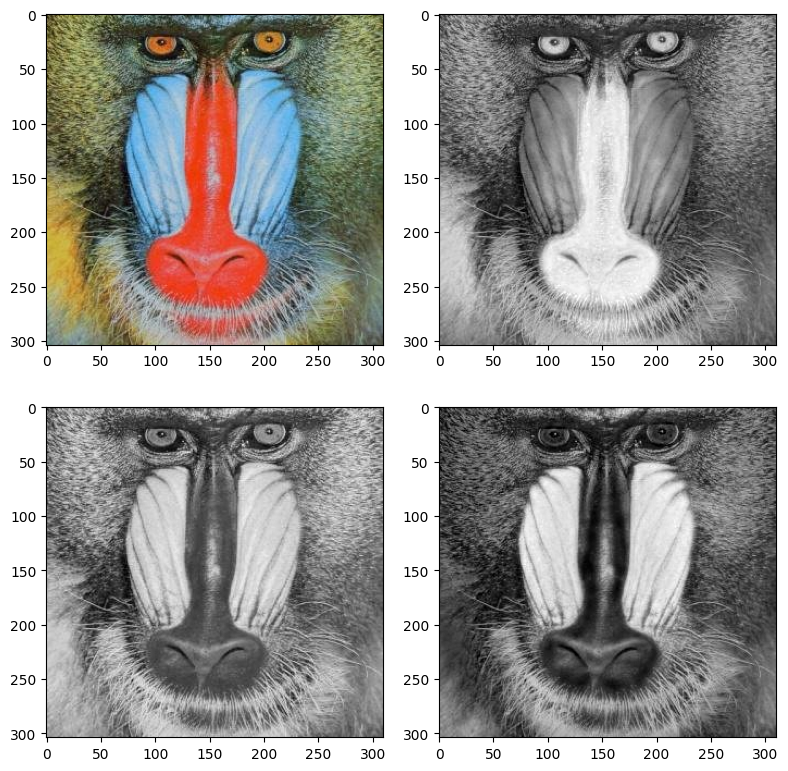

In [2]:
# Indicamos el camino a la imagen
imagenFilename = os.path.join("./content/Imagenes", 'mandril_color.jpg')
# Abrimos la imagen sin pasarla a escala de gris.
imagenPrueba = io.imread(imagenFilename)

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.ravel()

ax[0].imshow(imagenPrueba) # Imagen Compuesta
ax[1].imshow(imagenPrueba[:,:,0], cmap=plt.cm.gray) # Canal Rojo
ax[2].imshow(imagenPrueba[:,:,1], cmap=plt.cm.gray) # Canal Verde
ax[3].imshow(imagenPrueba[:,:,2], cmap=plt.cm.gray) # Canal Azul

fig.tight_layout()
plt.show()

# Histograma Por Canal



In [3]:
def histogramasPorCanalRGB(image):
  histogramaR, _ = np.histogram(image[:,:,0], bins=256, range=(0, 256))
  histogramaG, _ = np.histogram(image[:,:,1], bins=256, range=(0, 256))
  histogramaB, _ = np.histogram(image[:,:,2], bins=256, range=(0, 256))

  return histogramaR,histogramaG,histogramaB


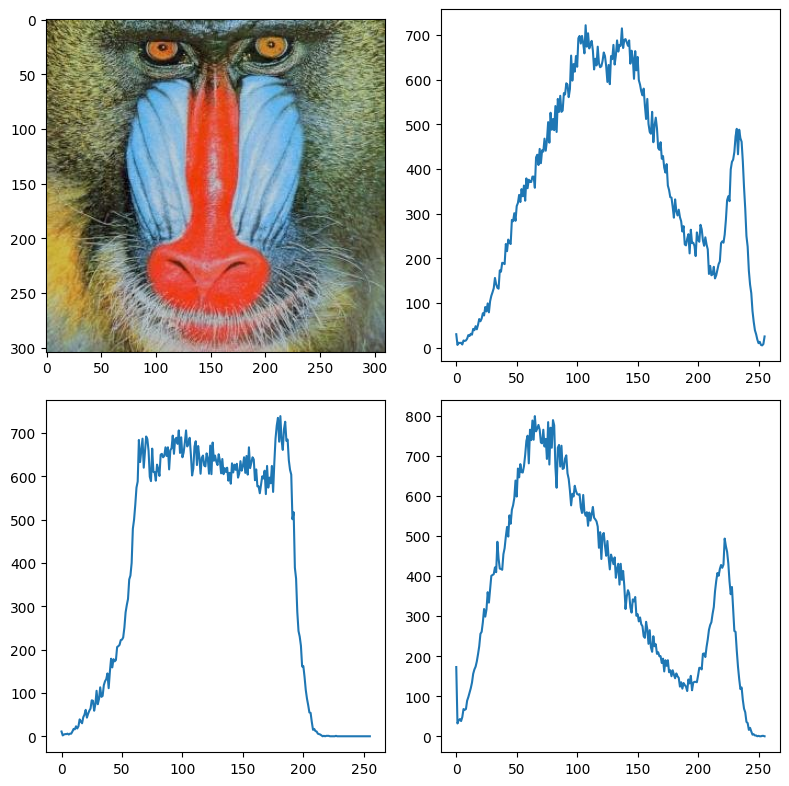

In [6]:
imagenFilename = os.path.join("./content/Imagenes", 'mandril_color.jpg')
imagenPrueba = io.imread(imagenFilename)
histR, histG, histB = histogramasPorCanalRGB(imagenPrueba)

# Mostramos el resultado final
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.ravel()

# Usamos imshow para graficar imagenes, utilizando el cmap plt.cm.gray para especificar que esta en escala de grises
ax[0].imshow(imagenPrueba)
ax[1].plot(range(256), histR)
ax[2].plot(range(256), histG)
ax[3].plot(range(256), histB)

fig.tight_layout()
plt.show()


#Ecualizacion de Histograma por Canal
Realizar la ecualizacion por cada uno de los canales y mostrar las imagenes resultantes del modificar un histograma y mantener los otros 2. Por ultimo, imprimir la imagen con sus 3 canales ecualizados.

*(ayuda: pueden utilizar exposure.equalize_hist(img))*

/home/ubuntu/miniconda3/lib/python3.11/site-packages/skimage/_shared/utils.py:438: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


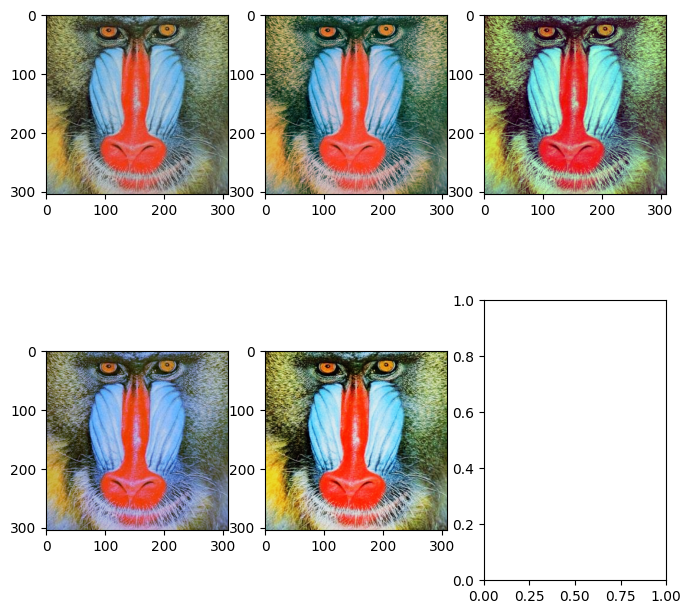

In [3]:
imagenFilename = os.path.join("./content/Imagenes", 'mandril_color.jpg')
imagenPrueba = io.imread(imagenFilename)

#Creamos los vectores donde guardar las imagenes ecualizadas
imgEcualizadaRojo = imagenPrueba.copy()
imgEcualizadaVerde = imagenPrueba.copy()
imgEcualizadaAzul = imagenPrueba.copy()
imgEcualizada = imagenPrueba.copy()

# Completar

# Ecualizamos el canal azul de la imagen utilizando exposure.equalize_hist, nos devuelve una imagen en formato float64 (0,1)
# Convertimos la imagen de float a uint8 utilizando img_as_ubyte
canalAzulEcualizado = exposure.equalize_hist(imagenPrueba[:,:,2])
imgEcualizadaAzul[:,:,2] = img_as_ubyte(canalAzulEcualizado)

canalRojoEcualizado = exposure.equalize_hist(imagenPrueba[:,:,0])
imgEcualizadaRojo[:,:,0] = img_as_ubyte(canalRojoEcualizado)

canalVerdeEcualizado = exposure.equalize_hist(imagenPrueba[:,:,1])
imgEcualizadaVerde[:,:,1] = img_as_ubyte(canalVerdeEcualizado)

imgEcualizada = exposure.equalize_hist(imagenPrueba)

fig, axes = plt.subplots(2, 3, figsize=(8, 8))
ax = axes.ravel()

ax[0].imshow(imagenPrueba)
ax[1].imshow(imgEcualizadaRojo)
ax[2].imshow(imgEcualizadaVerde)
ax[3].imshow(imgEcualizadaAzul)
ax[4].imshow(imgEcualizada)





#Conversion HSI a RGB y viceversa

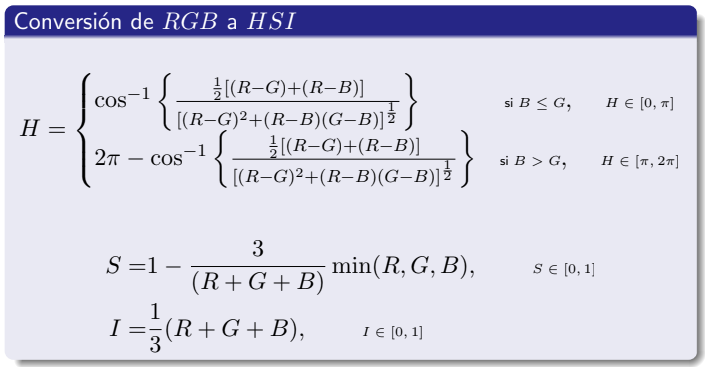


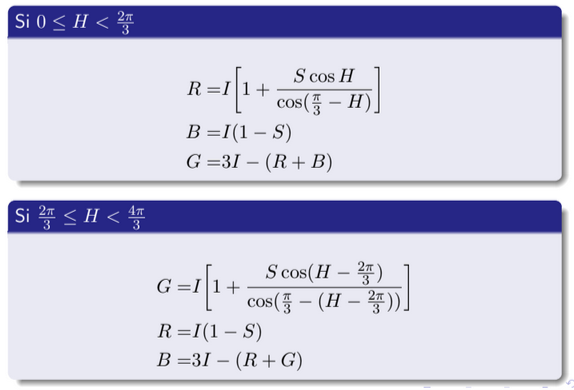

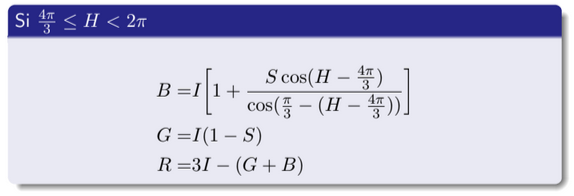



In [4]:
from skimage.color import rgb2hsv, hsv2rgb
def RGBaHSI(image):
  Rojo = 0
  Verde = 1
  Azul = 2
  rgbNormalizado = img_as_float(image)
  imagenRes = rgbNormalizado.copy()
  
  for x in  range(rgbNormalizado.shape[0]):
    for y in  range(rgbNormalizado.shape[1]):
      r = rgbNormalizado[x,y,Rojo]
      g = rgbNormalizado[x,y,Verde]
      b = rgbNormalizado[x,y,Azul]

      # Canal H
      h_1 = (((r-g)+(r-b))/2)
      h_2 = (np.sqrt((r-g)*(r-g)+(r-b)*(g-b)))
      if(h_2 == 0):
         h = 0
      else :
         h = np.arccos( h_1 / h_2 )
      
      if(b > g):
          h = 2*np.pi - h
      # Canal S
      s = 1 - ((3/(r+g+b))*min(min(r,g),b))
      # Canal i
      i = ((1/3)*(r+g+b)) 

      imagenRes[x,y,0] = h 
      imagenRes[x,y,1] = s 
      imagenRes[x,y,2] = i 

  return 

In [5]:
def HSIaRGB(image):
  #Completar
  res = img_as_ubyte(image.copy())

  for x in range(image.shape[0]):
    for y in range(image.shape[1]):
      h = image[x,y,0] 
      s = image[x,y,1] 
      i = image[x,y,2]
      
      R = 0
      B = 0
      G = 0

      if(0 <= h < ((2/3)*np.pi)):
        R = i * (1 + ((s*np.cos(h))//np.cos( (1/3)*np.pi - h )))
        B = i*(1-s)
        G = 3*i - (R + B)
      if(((2/3)*np.pi) <= h < ((4/3)*np.pi)):
        G = i * (1 + ((s*np.cos(h-(2/3)*np.pi))//np.cos( (1/3)*np.pi - h )))
        R = i*(1-s)
        B = 3*i - (R + G)
      if(((4/3)*np.pi) <= h < 2*np.pi):
        B = i * (1 + ((s*np.cos(h-(4/3)*np.pi))//np.cos( (1/3)*np.pi - h )))
        G = i*(1-s)
        R = 3*i - (G + B)
        
      res[x,y,0] = R * 255
      res[x,y,1] = G * 255
      res[x,y,2] = B * 255
      #print(res[x,y])
  #res =  hsv2rgb(image)
  return res


TypeError: 'NoneType' object is not subscriptable

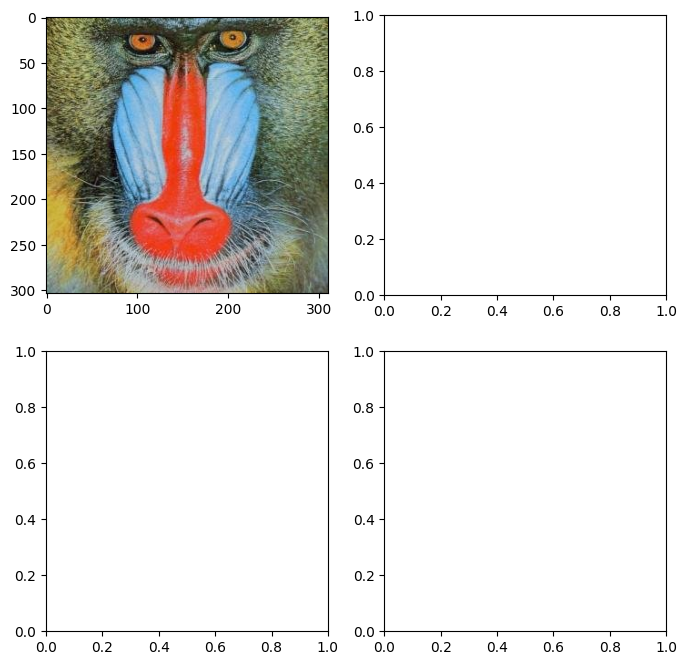

In [7]:
imagenFilename = os.path.join("./content/Imagenes", 'mandril_color.jpg')
imagenPrueba = io.imread(imagenFilename)

imageHSI = RGBaHSI(imagenPrueba)

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.ravel()

ax[0].imshow(imagenPrueba)
ax[1].imshow(imageHSI[:,:,0], cmap=plt.cm.gray)
ax[2].imshow(imageHSI[:,:,1], cmap=plt.cm.gray)
ax[3].imshow(imageHSI[:,:,2], cmap=plt.cm.gray)

# Ecualizacion de Intensidad

In [10]:
imagenFilename = os.path.join("./content/Imagenes", 'mandril_color.jpg')
imagenPrueba = io.imread(imagenFilename)

imageHSI = RGBaHSI(imagenPrueba)

imageHSIEcualizada = exposure.equalize_hist(imageHSI) #ECUALIZAR
imageRGBEcualizada = HSIaRGB(imageHSIEcualizada)

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.ravel()

ax[0].imshow(imagenPrueba)
ax[1].imshow(imageRGBEcualizada)
ax[2].imshow(imageHSI[:,:,2], cmap=plt.cm.gray)
ax[3].imshow(imageHSIEcualizada[:,:,2], cmap=plt.cm.gray)

AttributeError: 'NoneType' object has no attribute 'shape'

# Operadores Puntales en HSI
Escriban sus propios operadores puntuales y apliquen diferentes operaciones a cada canal por separado, estudiando como resulta la imagen al volver a RGB.

*(ayuda: utilizar la funcion np.vectorize para convertir una funcion puntual en un operador para toda la matriz. El resultado de la funcion siempre debe estar entre 0 y 1)*

In [198]:
#Funcion de ejemplo que invierte el valor, suponiendo que esta en escala (0,1)
def operadorEjemplo1(pixel):
  return 1-pixel

#Funcion de ejemplo que duplica el valor actual
def operadorEjemplo2(pixel):
  return 2*pixel

def operadorT(pixel):
  pixel_transformado = [np.log(pixel[0] + 1),pixel[1],pixel[2]]
  
  return pixel_transformado

def operadorPi(pixel):
  pixel = [pixel[0] - np.pi ,pixel[1],pixel[2]]
  return

def aplicarOperadorT(image):
  res = image.copy()

  for x in range(image.shape[0]):
    for y in range(image.shape[1]):
      res[x,y] = operadorT(res[x,y])
  
  return


def aplicarOperadorEj1(image):
  res = image.copy()

  for x in range(image.shape[0]):
    for y in range(image.shape[1]):
      res[x,y] = operadorEjemplo1(res[x,y])
  
  return


def aplicarOperadorEj2(image):
  res = image.copy()

  for x in range(image.shape[0]):
    for y in range(image.shape[1]):
      res[x,y] = operadorEjemplo2(res[x,y])
  
  return


def aplicarOperadorPi(image):
  res = image.copy()

  for x in range(image.shape[0]):
    for y in range(image.shape[1]):
      res[x,y] = operadorPi(res[x,y])
  
  return

In [11]:
imagenFilename = os.path.join("./content/Imagenes", 'mandril_color.jpg')
imagenPrueba = io.imread(imagenFilename)
operadorPuntualEjemplo1 = np.vectorize(operadorEjemplo1)
operadorPuntualEjemplo2 = np.vectorize(operadorEjemplo2)

imageHSI = RGBaHSI(imagenPrueba)

imageHSIOperardorEj1 = aplicarOperadorEj1(imageHSI)

imageHSIOperardorEj2 = aplicarOperadorEj2(imageHSI)

imageHSIOperardorT = aplicarOperadorT(imageHSI)

imageHSIOperardorPi = aplicarOperadorPi(imageHSI)

imageRGBOperadorEj1 = HSIaRGB(imageHSIOperardorEj1)

imageRGBOperadorEj2 = HSIaRGB(imageHSIOperardorEj2)

imageRGBOperadorT = HSIaRGB(imageHSIOperardorT)

imageRGBOperadorPi = HSIaRGB(imageHSIOperardorPi)

fig, axes = plt.subplots(4, 2, figsize=(8, 8))

ax = axes.ravel()

ax[0].imshow(imagenPrueba)
ax[1].imshow(imageRGBOperadorEj1)
ax[2].imshow(imageRGBOperadorEj2)
ax[3].imshow(imageRGBOperadorT)
ax[5].imshow(imageHSIOperardorPi)

NameError: name 'operadorEjemplo1' is not defined

#Realce de Saturacion
Multiplicar por una constante c > 1 cada pixel en el plano de la saturacion. Ver que esto aumenta la intensidad aparente.

Si c < 1 ver que reduce la intensidad del color.

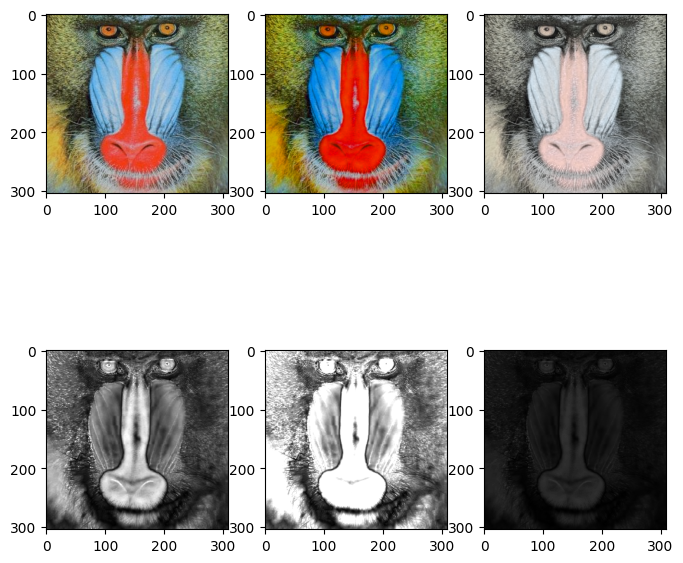

In [94]:
imagenFilename = os.path.join("./content/Imagenes", 'mandril_color.jpg')
imagenPrueba = io.imread(imagenFilename)

c1 = 2
imageHSI = RGBaHSI(imagenPrueba)
imageHSIModificada1 = imageHSI.copy()
imageHSIModificada1[:,:,1] = imageHSI[:,:,1]*c1
imageHSIModificada1 = np.clip(imageHSIModificada1,0,1)
# Asegurense que la Saturacion se encuentra en el rango (0,1) luego de aplicar la transformacion
imageRGBModificada1 = HSIaRGB(imageHSIModificada1)

c2 = 0.2
imageHSIModificada2 = imageHSI.copy()
imageHSIModificada2[:,:,1] = imageHSI[:,:,1]*c2
imageHSIModificada2 = np.clip(imageHSIModificada2,0,1)
imageRGBModificada2 = HSIaRGB(imageHSIModificada2.copy())


fig, axes = plt.subplots(2, 3, figsize=(8, 8))

axes[0,0].imshow(imagenPrueba)
axes[0,1].imshow(imageRGBModificada1)
axes[0,2].imshow(imageRGBModificada2)


axes[1,0].imshow(imageHSI[:,:,1], cmap=plt.cm.gray, vmin=0,vmax=1)
axes[1,1].imshow(imageHSIModificada1[:,:,1], cmap=plt.cm.gray, vmin=0,vmax=1)
axes[1,2].imshow(imageHSIModificada2[:,:,1], cmap=plt.cm.gray, vmin=0,vmax=1)


#Se realizan diferentes transformaciones lineales y no lineales al canal de saturación

In [89]:
imagenFilename = os.path.join("./content/Imagenes", 'mandril_color.jpg')
imagenPrueba = io.imread(imagenFilename)

imageHSI = RGBaHSI(imagenPrueba)

imagen1HSI = imageHSI.copy()
matrizconv = np.ones((13,13))/(13*13)
saturacionConv = ndimage.convolve(imagen1HSI[:,:,1], matrizconv)
imagen1HSI[:,:,1] = saturacionConv[:,:]
imagen1RGB = HSIaRGB(imagen1HSI)
print(imagen1HSI.shape, imagen1RGB.shape)
imagen2HSI = imageHSI.copy()
matrizconv = np.array([[1,2,1,2,1],[1,0,1,0,1],[1,2,1,2,1]])/(17)
saturacionConv = ndimage.convolve(imagen2HSI[:,:,1], matrizconv)
imagen2HSI[:,:,1] = saturacionConv[:,:]
imagen2RGB = HSIaRGB(imagen2HSI)

imagen3HSI = imageHSI.copy()
saturacionConv = ndimage.median_filter(imagen3HSI[:,:,1], size=13)
imagen3HSI[:,:,1] = saturacionConv[:,:]
imagen3RGB = HSIaRGB(imagen3HSI)

imagen4HSI = imageHSI.copy()
saturacionConv = ndimage.maximum_filter(imagen4HSI[:,:,1], size=13)
imagen4HSI[:,:,1] = saturacionConv[:,:]
imagen4RGB = HSIaRGB(imagen4HSI)

fig, axes = plt.subplots(5, 2, figsize=(8, 8))
ax = axes.ravel()

ax[0].imshow(imagenPrueba)
ax[1].imshow(imageHSI[:,:,1], cmap=plt.cm.gray, vmin=0,vmax=1)

ax[2].imshow(imagen1RGB)
ax[3].imshow(imagen1HSI[:,:,1], cmap=plt.cm.gray, vmin=0,vmax=1)

ax[4].imshow(imagen2RGB)
ax[5].imshow(imagen2HSI[:,:,1], cmap=plt.cm.gray, vmin=0,vmax=1)

ax[6].imshow(imagen3RGB)
ax[7].imshow(imagen3HSI[:,:,1], cmap=plt.cm.gray, vmin=0,vmax=1)

ax[8].imshow(imagen4RGB)
ax[9].imshow(imagen4HSI[:,:,1], cmap=plt.cm.gray, vmin=0,vmax=1)

AttributeError: 'NoneType' object has no attribute 'copy'

#Alteracion de Hue (cambio de tono)
Sumar la constante c a los valores del canal H y ver el efecto en los colores cuando c es muy chico yque sucede cuando c es muy grande.

(ayuda: Recordar que el tono representa un angulo en la *rueda de color*, donde 0 = 0 y 1 = 2π. Si al sumar una constante el valor es mayor a 1, el angulo deberia *dar la vuelta* como las manijas de un reloj. Lo mismo si c es negativo)

Por ejemplo, si c fuera 0.5, es decir sumar el angulo π, la transformacion tendria la forma:

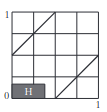

In [8]:
def cambioDeTono(tonoPixel, c):
  tonoPixel = tonoPixel + c
  if(tonoPixel>=1):
    tonoPixel = tonoPixel - 1
  return tonoPixel

In [13]:
imagenFilename = os.path.join("./content/Imagenes", 'mandril_color.jpg')
imagenPrueba = io.imread(imagenFilename)
operadorPuntualCambioDeTono = np.vectorize(cambioDeTono)

#Caso de c chico - c = 0.05
#En este caso vemos un realce de los verdes
#Por ejemplo originalmente el pelaje en la esquina inferior derecha es amarillento, despues de una pequeña rotación
#se acerca al verde lo que corresponde a la representacion del circulo de colores (el amarillo y verde son "adyacentes")
#Así vemos que en canal H hay pocas variaciones
imageHSI = RGBaHSI(imagenPrueba)
imageHSIModificada = imageHSI.copy()
imageHSIModificada[:,:,0] = operadorPuntualCambioDeTono(imageHSIModificada[:,:,0], 0.05) 
imageRGBModificada = HSIaRGB(imageHSIModificada)

#Caso de c grande - c = 0.9
#Para este caso vemos un realce de los colores cálidos: rojo, marron
#Por ejemplo, notamos que la mayoría de pelaje es originalmente verdecino.
#Al rotar significativamente, terminan en colores marrones.
#Esto se asocia al circulo de colores a una gran rotación antihoraria del verde al rojo
#Estos cambios se reflejan en el canal H con valores oscuros (habiendo "dado la vuelta" respecto a los valores originales por la fase) 
#en el pelaje indicando colores rojizos
imageHSIModificada2 = imageHSI.copy()
imageHSIModificada2[:,:,0] = operadorPuntualCambioDeTono(imageHSIModificada2[:,:,0], 0.9) 
imageRGBModificada2 = HSIaRGB(imageHSIModificada2)

fig, axes = plt.subplots(2, 3, figsize=(8, 8))
ax = axes.ravel()

ax[0].imshow(imagenPrueba)
ax[1].imshow(imageRGBModificada)
ax[2].imshow(imageRGBModificada2)


ax[3].imshow(imageHSI[:,:,0], cmap=plt.cm.gray, vmin=0,vmax=1)
ax[4].imshow(imageHSIModificada[:,:,0], cmap=plt.cm.gray, vmin=0,vmax=1)
ax[5].imshow(imageHSIModificada2[:,:,0], cmap=plt.cm.gray, vmin=0,vmax=1)


NameError: name 'cambioDeTono' is not defined

#Analisis por Canal
Ver cual es el canal donde los detalles son mas visibles y en en cual es mas distinguible un granulado en una imagen.

Ver a cual de los canales afectan mas los bordes difuminados.

Para este punto utilizar el data set de imagenes debajo del agua subidas al campus. Realicen ecualizacion en el canal necesario para resaltar los detalles de las imagenen, comparen con las imagenes ya post procesadas subidas al campus.

In [116]:
imagenFilename = os.path.join("./content/ColorImagenesRealesTdF", '1908xx.png')
imagenPrueba = PIL.Image.open(imagenFilename)
imagenPrueba = imagenPrueba.convert('RGB')
imagenPrueba = img_as_float(np.asarray(imagenPrueba))

imagenPruebaDifuminado = filters.gaussian(imagenPrueba)
imagenPruebaGranulado = util.random_noise(imagenPrueba,'s&p')



imagenPrueba = color.rgb2hsv(imagenPrueba)
imagenPruebaDifuminado = color.rgb2hsv(imagenPruebaDifuminado)
imagenPruebaGranulado = color.rgb2hsv(imagenPruebaGranulado)

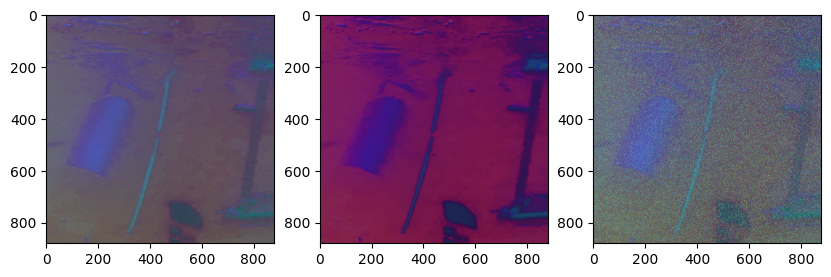

In [124]:
fig, axes = plt.subplots(1, 3, figsize=(10, 10))
ax = axes.ravel()

ax[0].imshow(imagenPrueba,cmap=plt.cm.gray,vmin=0,vmax=1)
ax[1].imshow(imagenPruebaDifuminado,cmap=plt.cm.gray,vmin=0,vmax=1)
ax[2].imshow(imagenPruebaGranulado,cmap=plt.cm.gray,vmin=0,vmax=1)

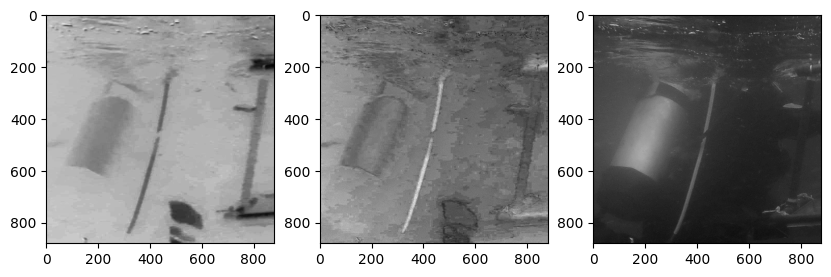

In [118]:
fig, axes = plt.subplots(1, 3, figsize=(10, 10))
ax = axes.ravel()
ax[0].imshow(imagenPrueba[:,:,0],cmap=plt.cm.gray,vmin=0,vmax=1)
ax[1].imshow(imagenPrueba[:,:,1],cmap=plt.cm.gray,vmin=0,vmax=1)
ax[2].imshow(imagenPrueba[:,:,2],cmap=plt.cm.gray,vmin=0,vmax=1)

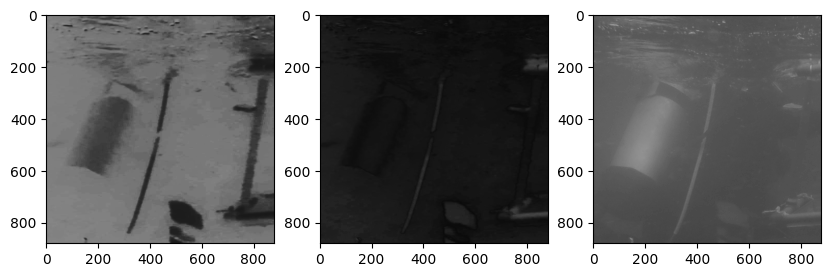

In [120]:
fig, axes = plt.subplots(1, 3, figsize=(10, 10))
ax = axes.ravel()
ax[0].imshow(imagenPruebaDifuminado[:,:,0],cmap=plt.cm.gray,vmin=0,vmax=1)
ax[1].imshow(imagenPruebaDifuminado[:,:,1],cmap=plt.cm.gray,vmin=0,vmax=1)
ax[2].imshow(imagenPruebaDifuminado[:,:,2],cmap=plt.cm.gray,vmin=0,vmax=1)

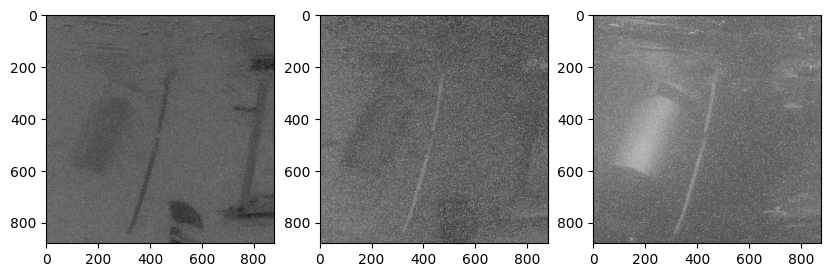

In [122]:
fig, axes = plt.subplots(1, 3, figsize=(10, 10))
ax = axes.ravel()
ax[0].imshow(imagenPruebaGranulado[:,:,0],cmap=plt.cm.gray,vmin=0,vmax=1)
ax[1].imshow(imagenPruebaGranulado[:,:,1],cmap=plt.cm.gray,vmin=0,vmax=1)
ax[2].imshow(imagenPruebaGranulado[:,:,2],cmap=plt.cm.gray,vmin=0,vmax=1)

## El canal que mantiene los detalles de la imagen con bordes blureados es el de Intensidad, mientras que el que más información pierde es el canal Saturation. La granulación afecta en particular a los canales Hue y Saturation
